 <center> <h1> TP SUIVI - Application des notions </h1> </br> <h2>  Classification sur les données de Parcoursup <h2> </center>

<center><img src=" 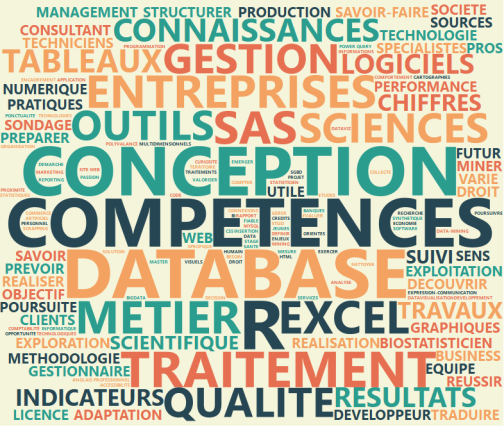"/></center>

## Présentation de la base de données

___

La plateforme Parcoursup permet aux bacheliers qui le souhaitent de s’inscrire en première année
de l’enseignement supérieur. Elle contient donc une base de données exhaustive des formations
présentes sur le territoire. Le jeu de données étudié
est bâti à partir de données de Parcoursup de la campagne 2021. Il couvre l’ensemble des 13 396
formations proposées hors apprentissages, ainsi que les 965 531 candidats ayant au mois un vœu
d’orientation validé en phase principale ou complémentaire. Les données sont téléchargeables [sur le site du gouvernement](https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup/information/?timezone=Europe%2FBerlin&sort=tri).

Parmi les données que l'on retrouve, on a le % de boursiers, de femmes, candidats et admis, les coordonnées géographiques des établissements, les caractéristiques des formations, si la formation est sélective ou non, etc. 

La base de données ne contient pas d'informations personnelles sur les futurs étudiants, car cela est interdit, on retrouve tout de même certaines données qui peuvent être considérées comme sensibles (la notion de boursier ou le sexe de la personne), car ces informations, seules, ne permettent pas d'identifier clairement un individu, comme on pourrait le faire avec son prénom, son nom de famille et son adresse, par exemple.

## Objectif 1 - Clustering : Système de recommandation de formations

___

L’objectif de ce sujet est de **construire un outil permettant à un lycéen de chercher des formations
similaires à une formation pré-sélectionnée**.

Exemple de scénario : un candidat sélectionne un DUT Informatique en Basse-Normandie. Le
modèle peut lui recommander par exemple une licence informatique à Caen, un DUT Informatique
similaire en Bretagne et un BTS Informatique en Haute-Normandie.

 <h2> Préparation des données </h2> <a class="anchor" id="chapter2"></a>
 
 ___

<h3> Importation </h3> <a class="anchor" id="section_2_1"></a>

On importe d'abord les données issues de Parcoursup dans une trame (un tableau) Pandas. Pour cela, on a besoin de la librairie associée.

In [ ]:
pip install Pandas

In [3]:
import pandas as pd

 Notre fichier de données se situe dans le dossier "Data" du dossier contenant ce tutoriel. Cela peut changer pour vous, vérifiez avant.

In [4]:
formations = pd.read_excel (r'Data/fr-esr-parcoursup.xlsx') # le fichier se nomme 'fr-esr-parcoursup' et est sous format '.xlsx', Excel.
formations.sample(5)

Session  \
9790      2021   
6630      2021   
12125     2021   
169       2021   
6495      2021   

      Statut de l’établissement de la filière de formation (public, privé…)  \
9790                                              Public                      
6630                                              Public                      
12125                       Privé enseignement supérieur                      
169                                               Public                      
6495                    Privé sous contrat d'association                      

      Code UAI de l'établissement  \
9790                     0751719L   
6630                     0560085N   
12125                    0022134J   
169                      9740478B   
6495                     0492246A   

                                           Établissement  \
9790                Université Sorbonne Nouvelle Paris 3   
6630   Ecole Nationale de Voile et des Sports Nautiqu...   
12125                    ELISA Aerospace Hauts de France   
169               Université de La Réunion - Saint Denis   
6495                                        ESAIP Angers   

      Code départemental de l’établissement Département de l’établissement  \
9790                                     75                          Paris   
6630                                     56                       Morbihan   
12125                                    02                          Aisne   
169                                     974                     La Réunion   
6495                                     49                 Maine-et-Loire   

      Région de l’établissement Académie de l’établissement  \
9790              Ile-de-France                       Paris   
6630                   Bretagne                      Rennes   
12125           Hauts-de-France                      Amiens   
169                  La Réunion                  La Réunion   
6495           Pays de la Loire                      Nantes   

      Commune de l’établissement              Sélectivité  ...  \
9790   Paris  5e  Arrondissement  formation non sélective  ...   
6630       Saint-Pierre-Quiberon      formation sélective  ...   
12125              Saint-Quentin      formation sélective  ...   
169                  Saint-Denis      formation sélective  ...   
6495    Saint-Barthélemy-d'Anjou      formation sélective  ...   

                       tri COD_AFF_FORM  \
9790         1_universités         9238   
6630   3_Autres formations        30915   
12125  3_Autres formations        22907   
169    3_Autres formations        12494   
6495   3_Autres formations        30825   

                                         LIB_FOR_VOE_INS  \
9790   Licence - Etudes théâtrales - Parcours Théâtre...   
6630                                       BPJEPS - Surf   
12125          Formation d'ingénieur Bac + 5 - bac STI2D   
169    CPESIP (Cycle préparatoire aux Etudes Supérieu...   
6495                                   Formation Bac + 3   

                  detail_forma2  \
9790                        NaN   
6630                        NaN   
12125  Concours Puissance Alpha   
169                         NaN   
6495   PUISSANCE ALPHA BACHELOR   

       Lien de la formation sur la plateforme Parcoursup  \
9790   https://dossier.parcoursup.fr/Candidat/carte?g...   
6630   https://dossier.parcoursup.fr/Candidat/carte?g...   
12125  https://dossier.parcoursup.fr/Candidat/carte?g...   
169    https://dossier.parcoursup.fr/Candidat/carte?g...   
6495   https://dossier.parcoursup.fr/Candidat/carte?g...   

      Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation  \
9790                                                89.0                                  
6630                                               100.0                                  
12125                                                0.0                                  
169                                   

On remplace les espaces, dans les noms des variables, par des "_". Cela va nous aider à sélectionner plus facilement ces variables.

In [5]:
formations.columns = [c.replace(' ', '_') for c in formations.columns]
list(formations.columns)

['Session',
 'Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)',
 "Code_UAI_de_l'établissement",
 'Établissement',
 'Code_départemental_de_l’établissement',
 'Département_de_l’établissement',
 'Région_de_l’établissement',
 'Académie_de_l’établissement',
 'Commune_de_l’établissement',
 'Sélectivité',
 'Filière_de_formation_très_agrégée',
 'Filière_de_formation_détaillée',
 'Filière_de_formation',
 'Filière_de_formation_détaillée_bis',
 'Filière_de_formation_très_détaillée',
 'Coordonnées_GPS_de_la_formation',
 'Capacité_de_l’établissement_par_formation',
 'Effectif_total_des_candidats_pour_une_formation',
 'Dont_effectif_des_candidates_pour_une_formation',
 'Effectif_total_des_candidats_en_phase_principale',
 'Dont_effectif_des_candidats_ayant_postulé_en_internat',
 'Effectif_des_candidats_néo_bacheliers_généraux_en_phase_principale',
 'Dont_effectif_des_candidats_boursiers_néo_bacheliers_généraux_en_phase_principale',
 'Effectif_des_candidats_néo_bacheliers_technol

Il y en a une grande quantité, la majorité ne sera pas utilisée et **il manque une information** claire qui permettrait de **différencier les formations par leur contenu**.

Ce qui différencie une licence en Mathématiques d'une licence en Droit, c'est les matières qui y sont étudiées. On va alors **créer un deuxième fichier où l'on va associer à chacun des domaines de formations les matières qui y sont étudiées**. Par exemple, la licence informatique sera associée à Mathématiques - Informatique et la licence STAPS sera associée à  SVT - Sport.

<center><img src=" 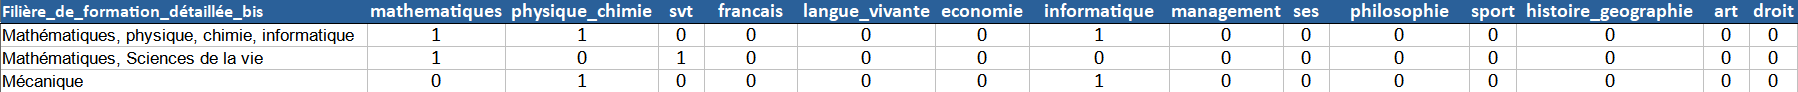"></center>

Bien sûr, il y a plusieurs centaines de domaines de formations, un fichier réalisé au préalable vous sera donc fourni.

In [6]:
matiere = pd.read_excel (r'Data/matiere_formation.xlsx') 
matiere.head(5)

Filière_de_formation_détaillée_bis  mathematiques  physique_chimie  \
0                 Accueil dans transports              0                0   
1        Accueil d'excellence en tourisme              0                0   
2                       Accueil réception              0                0   
3                Acoustique et Vibrations              0                1   
4  Activités aquatiques et de la natation              0                0   

   svt  francais  langue_vivante  economie  informatique  management  ses  \
0    0         0               0         0             1           1    1   
1    0         1               1         0             0           1    0   
2    0         1               1         0             0           1    1   
3    0         0               0         0             0           0    0   
4    1         0               0         0             0           0    0   

   philosophie  sport  histoire_geographie  art  droit  
0            0      0                    0    0      0  
1            0      0                    1    0      0  
2            0      0                    0    0      0  
3            0      0                    0    0      0  
4            0      1                    0    0      0

Nous n'avons pas non plus d'indicateur quant à la durée des études. On ne proposera pas une école d'ingénieur à un élève qui souhaite rentrer dans le monde professionnel à court terme.
On importe donc un fichier excel, fait au préalable avec la durée de chaque cycle de formation, 'est-à-dire le nombre d' d'années d'études moyen nécessaire pour obtenir un premier diplôme. Par exemple : un BTS se fait en 2 ans et une CPGE, qui peut déboucher sur une école d'ingénieur, ou une licence, sera codée en 3. Il s'agit ici d'estimations, qui ne sont pas réalisées par un expert dans le domaine.

In [7]:
duree = pd.read_excel (r'Data/duree_filiere.xlsx')
duree.sample(5)

Filière_de_formation  cycle_formation
43                                               CPES                2
11               CUPGE - Sciences, technologie, santé                2
40                  Formation valant grade de licence                3
21  Formation des écoles de commerce et de management                5
2                                      BTS - Agricole                2

## Base de données

Ces tableaux de données n'étant pas additionnables, on va créer une base de données "formations".

In [8]:
import sqlite3 # on importe la librairie SQLite

connection = sqlite3.connect('formations.db') 

Puis un curseur, qui permet d'aller à l'intérieur de notre base de données pour en sortir des informations.

In [9]:
curseur = connection.cursor()

À l'intérieur de cette base de données vierge, on va insérer nos 3 tables DUREE, MATIERES et FORMATIONS. 

In [10]:
import pandas as pd 

formations.to_sql('FORMATIONS', connection, if_exists='replace', index=False) # on les insère dans la base de données
matiere.to_sql('MATIERES', connection, if_exists='replace', index=False)
duree.to_sql('DUREE', connection, if_exists='replace', index=False)

On peut vérifier de cette manière :

In [11]:
pd.read_sql_query("SELECT * FROM FORMATIONS LIMIT 3", connection)

Session  \
0     2021   
1     2021   
2     2021   

  Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)  \
0                                             Public                      
1                                             Public                      
2                                             Public                      

  Code_UAI_de_l'établissement                       Établissement  \
0                    9760270P         Lycée Cité scolaire du nord   
1                    9760370Y  LYCEE POLYVALENT DE MAMOUDZOU NORD   
2                    9760370Y  LYCEE POLYVALENT DE MAMOUDZOU NORD   

  Code_départemental_de_l’établissement Département_de_l’établissement  \
0                                   976                        Mayotte   
1                                   976                        Mayotte   
2                                   976                        Mayotte   

  Région_de_l’établissement Académie_de_l’établissement  \
0                   Mayotte                     Mayotte   
1                   Mayotte                     Mayotte   
2                   Mayotte                     Mayotte   

  Commune_de_l’établissement          Sélectivité  ...       tri COD_AFF_FORM  \
0                  Mtsamboro  formation sélective  ...  2_Lycées        18856   
1                  Mamoudzou  formation sélective  ...  2_Lycées        20118   
2                  Mamoudzou  formation sélective  ...  2_Lycées        20120   

                                   LIB_FOR_VOE_INS detail_forma2  \
0               BTS - Services - Gestion de la PME          None   
1               BTS - Services - Gestion de la PME          None   
2  BTS - Services - Support à l'action managériale          None   

   Lien_de_la_formation_sur_la_plateforme_Parcoursup  \
0  https://dossier.parcoursup.fr/Candidat/carte?g...   
1  https://dossier.parcoursup.fr/Candidat/carte?g...   
2  https://dossier.parcoursup.fr/Candidat/carte?g...   

  Dont_taux_d’accès_des_candidats_ayant_un_bac_général_ayant_postulé_à_la_formation  \
0                                               23.0                                  
1                                               23.0                                  
2                                               23.0                                  

   Dont_taux_d’accès_des_candidats_ayant_un_bac_technologique_ayant_postulé_à_la_formation  \
0                                               43.0                                         
1                                               37.0                                         
2                                               54.0                                         

   Dont_taux_d’accès_des_candidats_ayant_un_bac_professionnel_ayant_postulé_à_la_formation  \
0                                               34.0                                         
1                                               40.0                                         
2                                               23.0                                         

   etablissement_id_paysage  composante_id_paysage  
0                     D4xrV                   None  
1                     z4xJC                   None  
2                     z4xJC                   None  

[3 rows x 118 columns]

In [12]:
pd.read_sql_query("SELECT * FROM DUREE LIMIT 3", connection)

Filière_de_formation  cycle_formation
0                  DCG                3
1       BTS - Services                2
2       BTS - Agricole                2

In [13]:
pd.read_sql_query("SELECT * FROM MATIERES LIMIT 3", connection)

Filière_de_formation_détaillée_bis  mathematiques  physique_chimie  svt  \
0            Accueil dans transports              0                0    0   
1   Accueil d'excellence en tourisme              0                0    0   
2                  Accueil réception              0                0    0   

   francais  langue_vivante  economie  informatique  management  ses  \
0         0               0         0             1           1    1   
1         1               1         0             0           1    0   
2         1               1         0             0           1    1   

   philosophie  sport  histoire_geographie  art  droit  
0            0      0                    0    0      0  
1            0      0                    1    0      0  
2            0      0                    0    0      0

Pour fusionner les 3 tables de cette variable, on a :

In [14]:
df = pd.read_sql_query("SELECT * FROM FORMATIONS JOIN DUREE ON DUREE.Filière_de_formation = FORMATIONS.Filière_de_formation JOIN MATIERES ON MATIERES.Filière_de_formation_détaillée_bis = FORMATIONS.Filière_de_formation_détaillée_bis", connection)
df.sample(5)

Session  \
5921      2021   
3610      2021   
7115      2021   
12200     2021   
6603      2021   

      Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)  \
5921                                              Public                      
3610                                              Public                      
7115                                              Public                      
12200                   Privé sous contrat d'association                      
6603                    Privé sous contrat d'association                      

      Code_UAI_de_l'établissement                        Établissement  \
5921                     0440984F                 Université de Nantes   
3610                     0381775Y                 I.U.T. 2 de Grenoble   
7115                     0450064A  Lycée professionnel Gaudier-Brzeska   
12200                    0801742J                  Lycée La Providence   
6603                     0490075R                          ESEO Angers   

      Code_départemental_de_l’établissement Département_de_l’établissement  \
5921                                     44               Loire-Atlantique   
3610                                     38                          Isère   
7115                                     45                         Loiret   
12200                                    80                          Somme   
6603                                     49                 Maine-et-Loire   

      Région_de_l’établissement Académie_de_l’établissement  \
5921           Pays de la Loire                      Nantes   
3610       Auvergne-Rhône-Alpes                    Grenoble   
7115        Centre-Val de Loire               Orléans-Tours   
12200           Hauts-de-France                      Amiens   
6603           Pays de la Loire                      Nantes   

      Commune_de_l’établissement              Sélectivité  ... langue_vivante  \
5921                      Nantes  formation non sélective  ...              1   
3610                    Grenoble      formation sélective  ...              1   
7115         Saint-Jean-de-Braye      formation sélective  ...              1   
12200                     Amiens      formation sélective  ...              0   
6603                      Angers      formation sélective  ...              0   

      economie informatique management ses philosophie  sport  \
5921         0            1          0   0           0      0   
3610         0            0          1   1           0      0   
7115         0            1          0   0           0      0   
12200        0            1          0   0           0      0   
6603         0            1          0   0           0      0   

       histoire_geographie  art  droit  
5921                     0    0      0  
3610                     0    0      1  
7115                     0    0      0  
12200                    0    0      0  
6603                     0    0      0  

[5 rows x 135 columns]

Nos fichiers sont fusionnés, on peut désormais traiter les données.

<h3> Préparation </h3> <a class="anchor" id="section_2_2"></a>

On ajoute un ID aux formations, afin de les sélectionner plus simplement.

In [15]:
df.insert(0, 'ID', range(1, 1 + len(df)))

On divise la variable 'Coordonnées GPS de la formation' en deux, afin de pouvoir utiliser les coordonnées plus tard, dans le but de calculer la distance entre deux formations.

In [16]:
df[['Longitude','Latitude']] = df.Coordonnées_GPS_de_la_formation.str.split(", ",expand=True,)

df[["Longitude", "Latitude"]] = df[["Longitude", "Latitude"]].apply(pd.to_numeric)

On va fusionner les 3 tables importées, afin d'avoir une table complète.

Parmi les variables que nous utiliserons par la suite, on voit que les coordonnées sont des variables avec beaucoup de NA, cela s'explique par le fait que certaines coordonnées ne soient pas communiqués dans la base de données initiales.

In [17]:
df[['Longitude',"Latitude","Capacité_de_l’établissement_par_formation","mathematiques","physique_chimie","svt","francais","langue_vivante","economie","informatique","management","ses","philosophie","sport","histoire_geographie","art","droit","cycle_formation"]].isna().sum()

Longitude                                    144
Latitude                                     144
Capacité_de_l’établissement_par_formation      0
mathematiques                                  0
physique_chimie                                0
svt                                            0
francais                                       0
langue_vivante                                 0
economie                                       0
informatique                                   0
management                                     0
ses                                            0
philosophie                                    0
sport                                          0
histoire_geographie                            0
art                                            0
droit                                          0
cycle_formation                                0
dtype: int64

On souhaite remplacer tous les NA par une moyenne des coordonnées du département de la formation en question. Cette mesure permet d'obtenir une estimation des coordonnées de la formation. </br>
La table ci-dessous correspond aux moyennes des coordonnées des départements.

In [18]:
coordonnees_departements = df[["Département_de_l’établissement","Longitude","Latitude"]].groupby("Département_de_l’établissement").mean().rename_axis("Département_de_l’établissement").reset_index()
coordonnees_departements.sample(5)

Département_de_l’établissement  Longitude   Latitude
74                           Nord  50.585622   3.120640
54                     La Réunion -20.755663  55.249140
98                       Vaucluse  43.948296   4.869445
57                          Loire  45.511820   4.356802
33                           Gers  43.629817   0.545606

Toutes les formations avec des coordonnées "NaN" auront comme coordonnées la moyenne des autres coordonnées des formations dans le département.

In [19]:
for i in range (1,len(df.index)):
    if df['Longitude'][i] != df['Longitude'][i] :
        df.loc[i,"Longitude"] = coordonnees_departements["Longitude"].loc[coordonnees_departements["Département_de_l’établissement"] == df["Département_de_l’établissement"][i]].values[0]

for i in range (1,len(df.index)):
    if df['Latitude'][i] != df['Latitude'][i] :
        df.loc[i,"Latitude"] = coordonnees_departements["Latitude"].loc[coordonnees_departements["Département_de_l’établissement"] == df["Département_de_l’établissement"][i]].values[0]


Après vérification, il n'y a plus de "NaN".

In [20]:
df[['Longitude',"Latitude"]].isna().sum()

Longitude    0
Latitude     0
dtype: int64

<h3> Clustering </h3> <a class="anchor" id="section_2_3"></a>

 <h4> Sélection des variables </h4> <a class="anchor" id="section_2_3_1"></a>

Ici, pour la sélection des variables, nous nous appuierons sur : </br></br>

- le nombre d'élèves par classe (certains élèves ont besoin de se sentir suivis, comme en BUT, par exemple, ) </br>
- les matières de la formation rapportées aux matières étudiées au lycée (cela permet d'avoir des matières pertinentes sans avoir des centaines de matières différentes) </br>
- le cycle de formation, qui correspond au nombre d'années estimées pour avoir un premier diplôme (il ne nous semble pas pertinent de proposer une formation bac +5, à un élève qui veut initialement faire un BTS, ou une formation d'1 an)

In [162]:
df_variables_selectionnees=df[["Capacité_de_l’établissement_par_formation","mathematiques","physique_chimie","svt","francais","langue_vivante","economie","informatique","management","ses","philosophie","sport","histoire_geographie","art","droit","cycle_formation"]]
df_variables_selectionnees

Capacité_de_l’établissement_par_formation  mathematiques  \
0                                             35              0   
1                                             35              0   
2                                             35              0   
3                                             30              0   
4                                             24              0   
...                                          ...            ...   
13390                                         20              0   
13391                                         20              0   
13392                                         15              0   
13393                                         15              0   
13394                                         24              0   

       physique_chimie  svt  francais  langue_vivante  economie  informatique  \
0                    0    0         0               0         1             0   
1                    0    0         0               0         1             0   
2                    0    0         0               0         1             0   
3                    0    0         0               0         1             0   
4                    0    0         1               1         0             0   
...                ...  ...       ...             ...       ...           ...   
13390                0    0         0               0         0             1   
13391                0    0         0               0         0             1   
13392                0    0         0               0         0             1   
13393                0    0         0               0         0             1   
13394                0    0         0               0         0             1   

       management  ses  philosophie  sport  histoire_geographie  art  droit  \
0               1    1            0      0                    0    0      1   
1               1    1            0      0                    0    0      1   
2               1    0            0      0                    0    0      1   
3               0    0            0      0                    0    0      0   
4               1    1            0      0                    0    0      0   
...           ...  ...          ...    ...                  ...  ...    ...   
13390           0    0            0      0                    0    0      0   
13391           1    1            0      0                    0    0      0   
13392           0    0            0      0                    0    0      0   
13393           0    0            0      0                    0    0      0   
13394           1    1            0      0                    0    0      0   

       cycle_formation  
0                    2  
1                    2  
2                    2  
3                    1  
4                    1  
...                ...  
13390                1  
13391                1  
13392                1  
13393                1  
13394                1  

[13395 rows x 16 columns]

On vérifie qu'il n'y a pas de valeurs manquantes :

In [22]:
df_variables_selectionnees.isna().sum()

Capacité_de_l’établissement_par_formation    0
mathematiques                                0
physique_chimie                              0
svt                                          0
francais                                     0
langue_vivante                               0
economie                                     0
informatique                                 0
management                                   0
ses                                          0
philosophie                                  0
sport                                        0
histoire_geographie                          0
art                                          0
droit                                        0
cycle_formation                              0
dtype: int64

Il est important de normaliser les variables, afin qu'elles soient comparables.

In [23]:
normalized_df_variables_selectionnees=(df_variables_selectionnees-df_variables_selectionnees.mean())/df_variables_selectionnees.std()

 <h4> Selection du nombre optimal de clusters </h4> <a class="anchor" id="section_2_3_2"></a>

Afin de déterminer le nombre optimal de clusters, on va utiliser la méthode "K-mean elbow". Cette méthode se base sur la distorsion, la somme des distances inter-centroïdes, au carré.

In [24]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_df_variables_selectionnees)
    distortions.append(kmeanModel.inertia_)

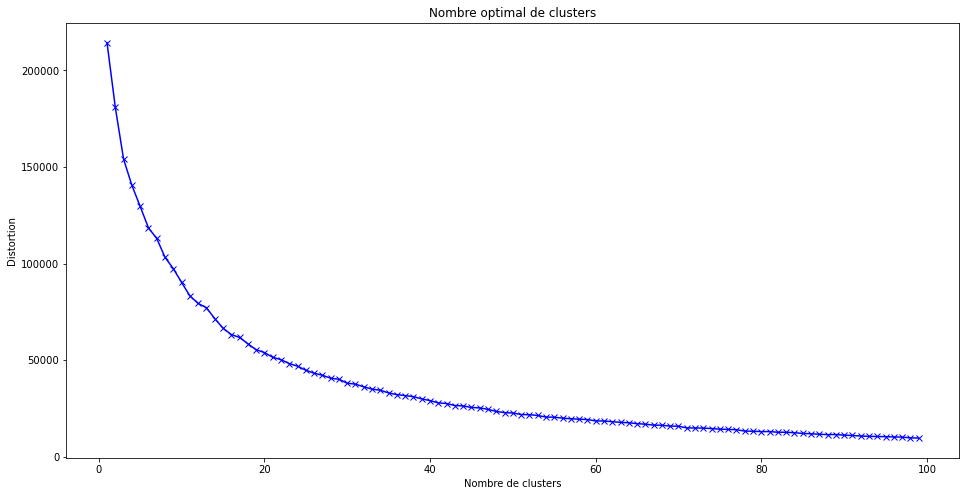

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distortion')
plt.title('Nombre optimal de clusters')
plt.show()

Ici, le point du "coude", indique un nombre de clusters optimal autour de 20 à 40 clusters. Nous prendrons légèrement plus (45), afin d'avoir des résultats plus précis.

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=45,n_init = 100).fit(normalized_df_variables_selectionnees) # n_init permet de reproduire la manip

Enfin, nous ajoutons les clusters indiqués à notre table initiale.

In [27]:
df['Cluster'] = kmeans.labels_

<h2> Utilisation </h2> <a class="anchor" id="chapter3"></a>

___

<h6> Afin de savoir quelle formation l'élève souhaite faire, nous allons lui demander, au travers de 3 étapes. Ces étapes servent à guider l'élève vers le choix de sa formation. Chaques étapes seront accompagnées d'une liste, leur montrant les choix disponibles. </h6>

<span style="color: red"> Attention ! À chaques étapes, le choix de la formation se fera au travers d'une nouvelle fenêtre, qui apparaîtra sur votre écran. <br>
Veillez à ne pas la louper ! La fenêtre peut s'ouvrir avec une icône trompeuse (un icône Rstudio, par exemple). </span>

<h3>Choisir une académie</h3> <a class="anchor" id="section_3_1"></a>

Le premier filtre utilisé concerne la région de la formation. On triera ensuite les formations en fonction de la région sélectionnée.

In [ ]:
from tkinter import *

df_aca=df["Académie_de_l’établissement"].sort_values().unique().tolist()

choix_academie=""

def submit():
    global choix_academie
    choix_academie = listbox.get(listbox.curselection())
    root.destroy()

root = Tk()
root.title("Dans quelle région se trouve votre formation ?")
root.geometry("200x530")
listbox = Listbox(root)
listbox.pack(side = LEFT, fill = BOTH, expand=1)
scrollbar = Scrollbar(root)
scrollbar.pack(side = RIGHT, fill = BOTH)

for i in range(len(df_aca)):
    listbox.insert(END, df_aca[i])
    
listbox.config(yscrollcommand = scrollbar.set)
scrollbar.config(command = listbox.yview)

submitbutton = Button(root, text="Choisir",command=submit)
submitbutton.pack()

root.mainloop()

df_academie=df[df["Académie_de_l’établissement"]== choix_academie]

<h3> Choisir le type de la formation </h3> <a class="anchor" id="section_3_2"></a>

Le second filtre utilisé concerne le type de la formation. On triera ensuite les formations en fonction de la région selectionnée, puis de la formation sélectionnée.

In [ ]:
df_forma=df_academie["Filière_de_formation_très_agrégée"].sort_values().unique().tolist()

choix_formation=""

def submit():
    global choix_formation
    choix_formation = listbox.get(listbox.curselection())
    root.destroy()

root = Tk()
root.title("De quel type est votre formation ?")
root.geometry("200x180")
listbox = Listbox(root)
listbox.pack(side = LEFT, fill = BOTH, expand=1)
scrollbar = Scrollbar(root)
scrollbar.pack(side = RIGHT, fill = BOTH)

for i in range(len(df_forma)):
    listbox.insert(END, df_forma[i])
    
listbox.config(yscrollcommand = scrollbar.set)
scrollbar.config(command = listbox.yview)

submitbutton = Button(root, text="Choisir",command=submit)
submitbutton.pack()

root.mainloop()

df_formation=df_academie[df_academie["Filière_de_formation_très_agrégée"] == choix_formation].sort_values('Filière_de_formation_détaillée')

<h3> Choisir la formation </h3> <a class="anchor" id="section_3_3"></a>

Le dernier filtre utilisé demande directement la formation à l'utilisateur. La formation sélectionnée sera donc celle-ci.

In [ ]:
choix=""

def submit():
    global choix
    choix = listbox.get(listbox.curselection())
    root.destroy()

root = Tk()
root.title("Quelle est votre formation ?")
root.geometry("5000x5000")
listbox = Listbox(root)
listbox.pack(side = LEFT, fill = BOTH, expand=1)
scrollbar = Scrollbar(root)
scrollbar.pack(side = RIGHT, fill = BOTH)

for i in df_formation.index:
    listbox.insert(END, df_formation["Filière_de_formation_détaillée"][i])

listbox.config(yscrollcommand = scrollbar.set)
scrollbar.config(command = listbox.yview)

submitbutton = Button(root, text="Choisir",command=submit)
submitbutton.pack()

root.mainloop()

On affiche le choix qu'a fait l'utilisateur, afin de vérifier qu'il n'y a pas d'erreurs.

In [ ]:
choix

<h3> La formation choisie </h3> <a class="anchor" id="section_3_4"></a>

In [ ]:
formation_choisie = df_formation[df_formation["Filière_de_formation_détaillée"] == choix].head(1)
formation_choisie

<h2> Sortie </h2> <a class="anchor" id="chapter4"></a>

___

<h3> Distance euclidienne </h3> <a class="anchor" id="section_4_1"></a>

Maintenant que la formation est choisie, on va utiliser la distance euclienne entre la formation choisie et les autres formations, afin de quantifier la distance séparant les formations. Selon nous, cette méthode est beaucoup plus efficace que celle de trier par régions. Elle possède cependant un défaut, elle ne prend pas en compte la topographie du territoire. En effet, la présence d'eau ou de reliefs n'est pas pris en compte.

In [ ]:
import numpy
import numpy as np

Point_1 = numpy.array((float(df.loc[df['ID'] == int(formation_choisie["ID"]), 'Longitude']),float(df.loc[df['ID'] == int(formation_choisie["ID"]), 'Latitude'])))
Distance_euclidienne=[]

for i in range(0,len(df)):
    Point_2=numpy.array((df.at[i,"Longitude"],df.at[i,"Latitude"]))
    Distance_euclidienne.append(np.linalg.norm(Point_1-Point_2))
    Point_2=numpy.array([])

In [ ]:
df["Distance_euclidienne"] = Distance_euclidienne

<h3> Sélection du cluster </h3> <a class="anchor" id="section_4_2"></a>

On cherche le cluster de la formation choisie, afin de définir les clusters à afficher. Pour cela, on utilise l'ID de la formation.

In [ ]:
cluster_formation = int(df.loc[df['ID'] == int(formation_choisie["ID"]), 'Cluster'])
cluster_formation

On affiche les formations appartenantes au même cluster que la formation choisie. On trie ces résultats par distance euclidienne. Enfin, on ne choisit que les 35 plus proches, afin de ne pas afficher une liste trop longue, qui serait trop peu pertinente, tout en gardant un nombre de formations suffisantes pour avoir de la diversité.

Les variables sélectionnées sont :

- Etablissement, cela sert surtout pour différencier les écoles d'ingénieur.
- Commune de l'Etablissement, c'est le marqueur géographique le plus précis. Le périmètre restant restreint par le filtre "Distance Euclidienne", il y a peu de risque de confusion des communes, par l'utilisateur
- Filière_de_formation_très_agrégée et Filière_de_formation_détaillée_bis, ces variables permettent de décrire la majorité des formations (sauf les écoles d'ingénieurs).

On garde la formation choisie, car cela nous permet vérifier que la sortie est la bonne.

In [ ]:
df_groupe_cluster_formation = df[df.Cluster == cluster_formation]
formation_proposee = df_groupe_cluster_formation[["Établissement","Commune_de_l’établissement","Filière_de_formation_très_agrégée","Filière_de_formation_détaillée_bis","cycle_formation","Distance_euclidienne"]].sort_values(by=['Distance_euclidienne']
)
formation_proposee[["Établissement","Commune_de_l’établissement","Filière_de_formation_très_agrégée","Filière_de_formation_détaillée_bis"]].head(35)

<h3> Carte des formations proposées</h3> <a class="anchor" id="section_4_3"></a>

Afin d'avoir une visualisation des formations proposées, nous proposons une carte, où est affichée la position des formations proposées.

Sélection des variables nécessaires à la création de la carte, c'est-à-dire les coordonnées géographiques pour les placer et les informations sur la formation afin de nommer les points de la carte.

In [ ]:
df_map = df_groupe_cluster_formation[["Filière_de_formation_détaillée","Filière_de_formation_détaillée_bis","Longitude","Latitude","Distance_euclidienne"]].sort_values(by=['Distance_euclidienne'])

On vérifie qu'il n'y a pas de NA.

In [ ]:
df_map.isna().sum()

On affiche les formations proposées sur une carte à l'aide de folium, pour cela, il faut d'abord créer une carte vierge et centrée sur les formations que l'on va ajouter.

In [ ]:
import folium

carte = folium.Map(location=[float(df_map.iloc[0][["Longitude"]]),float(df_map.iloc[0][["Latitude"]])], tiles="OpenStreetMap", zoom_start=7)

carte

Puis on ajoute chaques formations sur la carte comme étant des points.

In [ ]:
for i in range(0,len(df_map.head(35))):
   folium.Marker(
      location=[df_map.head(35).iloc[i]['Longitude'], df_map.head(35).iloc[i]['Latitude']],
      popup=df_map.head(35).iloc[i]['Filière_de_formation_détaillée_bis'],
   ).add_to(carte)

carte

## Objectif 2 - Analyse prédictive : Attraction des formations Parcoursup.

___

La création d'une nouvelle formation demandant de nombreuses réformes et investissements, elle doit nécessairement s'accompagner d'un grand nombre de candidats pour être rentabilisée (même si elle est publique !). L’objectif de ce sujet est donc de **tenter de prédire l'attraction potentielle d'une formation venant d'être créée**.

Exemple de scénario : les licences de droit étant très demandées, la création d'une nouvelle licence de droit doit aussi pouvoir être associée comme pouvant être très demandée.

## Mise en pratique : 

Pour cela, nous allons partir de la base de données précédemment créée : "formations.db" 

In [3]:
import sqlite3 # on importe la librairie SQLite

connection = sqlite3.connect('formations.db') 

In [4]:
import pandas as pd 

df = pd.read_sql_query("SELECT * FROM FORMATIONS JOIN DUREE ON DUREE.Filière_de_formation = FORMATIONS.Filière_de_formation JOIN MATIERES ON MATIERES.Filière_de_formation_détaillée_bis = FORMATIONS.Filière_de_formation_détaillée_bis", connection)
df.sample(5)

Session  \
8487      2021   
6599      2021   
12313     2021   
2979      2021   
4007      2021   

      Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)  \
8487                                              Public                      
6599                    Privé sous contrat d'association                      
12313                                             Public                      
2979                                              Public                      
4007                                              Public                      

      Code_UAI_de_l'établissement  \
8487                     0541205S   
6599                     0490075R   
12313                    0801864S   
2979                     0331766R   
4007                     0731383G   

                                         Établissement  \
8487   I.U.T de Nancy-Brabois - Université de Lorraine   
6599                                       ESEO Angers   
12313                                   Lycée du Vimeu   
2979                     Université Bordeaux Montaigne   
4007     Université Savoie Mont Blanc - Bourget-du-Lac   

      Code_départemental_de_l’établissement Département_de_l’établissement  \
8487                                     54             Meurthe-et-Moselle   
6599                                     49                 Maine-et-Loire   
12313                                    80                          Somme   
2979                                     33                        Gironde   
4007                                     73                         Savoie   

      Région_de_l’établissement Académie_de_l’établissement  \
8487                  Grand Est                  Nancy-Metz   
6599           Pays de la Loire                      Nantes   
12313           Hauts-de-France                      Amiens   
2979         Nouvelle-Aquitaine                    Bordeaux   
4007       Auvergne-Rhône-Alpes                    Grenoble   

      Commune_de_l’établissement              Sélectivité  ... langue_vivante  \
8487           Villers-lès-Nancy      formation sélective  ...              0   
6599                      Angers      formation sélective  ...              1   
12313        Friville-Escarbotin      formation sélective  ...              1   
2979                      Pessac  formation non sélective  ...              0   
4007           Le Bourget-du-Lac  formation non sélective  ...              1   

      economie informatique management ses philosophie  sport  \
8487         0            1          0   0           0      0   
6599         1            1          1   1           1      1   
12313        0            0          1   0           0      0   
2979         0            0          0   0           0      0   
4007         0            1          0   0           0      0   

       histoire_geographie  art  droit  
8487                     0    0      0  
6599                     1    1      1  
12313                    0    0      1  
2979                     1    0      0  
4007                     0    0      0  

[5 rows x 135 columns]

In [136]:
df = pd.read_sql_query("SELECT * FROM FORMATIONS JOIN DUREE ON DUREE.Filière_de_formation = FORMATIONS.Filière_de_formation JOIN MATIERES ON MATIERES.Filière_de_formation_détaillée_bis = FORMATIONS.Filière_de_formation_détaillée_bis", connection  )

df.sample(5)

Session  \
9118      2021   
12954     2021   
4720      2021   
3881      2021   
12800     2021   

      Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)  \
9118                                              Public                      
12954                   Privé sous contrat d'association                      
4720                                              Public                      
3881                                              Public                      
12800                                             Public                      

      Code_UAI_de_l'établissement                           Établissement  \
9118                     0780015T            Lycée Militaire de Saint-Cyr   
12954                    0593007Y                   Lycée Frédéric OZANAM   
4720                     0692517L                      LPO Camus-Sermenaz   
3881                     0380081G  Lycée Ella Fitzgerald St Romain en Gal   
12800                    0597065J                     Université de Lille   

      Code_départemental_de_l’établissement Département_de_l’établissement  \
9118                                     78                       Yvelines   
12954                                    59                           Nord   
4720                                     69                          Rhône   
3881                                     38                          Isère   
12800                                    59                           Nord   

      Région_de_l’établissement Académie_de_l’établissement  \
9118              Ile-de-France                  Versailles   
12954           Hauts-de-France                       Lille   
4720       Auvergne-Rhône-Alpes                        Lyon   
3881       Auvergne-Rhône-Alpes                    Grenoble   
12800           Hauts-de-France                       Lille   

      Commune_de_l’établissement          Sélectivité  ... langue_vivante  \
9118           Saint-Cyr-l'Ecole  formation sélective  ...              1   
12954                      Lille  formation sélective  ...              0   
4720            Rillieux-la-Pape  formation sélective  ...              0   
3881                      Vienne  formation sélective  ...              0   
12800                      Lille  formation sélective  ...              1   

      economie informatique management ses philosophie  sport  \
9118         0            1          0   0           0      0   
12954        1            0          1   0           0      0   
4720         1            0          1   1           0      0   
3881         1            0          1   0           0      0   
12800        0            0          0   0           1      0   

       histoire_geographie  art  droit  
9118                     0    0      0  
12954                    0    0      0  
4720                     0    0      1  
3881                     0    0      0  
12800                    0    1      0  

[5 rows x 135 columns]

La base de données est bien importée.

### Choix des variables

Ici, on va partir sur un modèle complet, c'est-à-dire : avec le plus de variables possibles. On retirera ensuite les variables non-pertinentes une par une. Cela permet de n'oublier aucune variable, mais va nous demander d'en recoder un grand nombre, dont les inutiles.

### Recoder les variables

On regarde toutes les variables à recoder, c'est-à-dire les variables catégorielles.

In [5]:
plus_de_2 = df.select_dtypes(include='O').keys()
plus_de_2

Index(['Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)',
       'Code_UAI_de_l'établissement', 'Établissement',
       'Code_départemental_de_l’établissement',
       'Département_de_l’établissement', 'Région_de_l’établissement',
       'Académie_de_l’établissement', 'Commune_de_l’établissement',
       'Sélectivité', 'Filière_de_formation_très_agrégée',
       'Filière_de_formation_détaillée', 'Filière_de_formation',
       'Filière_de_formation_détaillée_bis',
       'Filière_de_formation_très_détaillée',
       'Coordonnées_GPS_de_la_formation',
       'Regroupement_1_effectué_par_les_formations_pour_les_classements',
       'Regroupement_2_effectué_par_les_formations_pour_les_classements',
       'Regroupement_3_effectué_par_les_formations_pour_les_classements',
       'list_com', 'tri', 'LIB_FOR_VOE_INS', 'detail_forma2',
       'Lien_de_la_formation_sur_la_plateforme_Parcoursup',
       'etablissement_id_paysage', 'composante_id_paysage',
       'Filière_de

Puis on recode les variables catégorielles qui ont un sens pour notre analyse :

In [6]:
df["Sélectivité"].unique()

array(['formation sélective', 'formation non sélective'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sélectivité_encodee'] = encoder.fit_transform(df['Sélectivité'])
df[['Sélectivité','Sélectivité_encodee']].sample(5)

Sélectivité  Sélectivité_encodee
11435  formation non sélective                    0
3109   formation non sélective                    0
13035      formation sélective                    1
8547       formation sélective                    1
11722      formation sélective                    1

In [8]:
fil = df["Filière_de_formation_très_agrégée"].unique()
fil

array(['BTS', 'Autre formation', 'EFTS', 'IFSI', 'CPGE', 'Licence',
       'Licence_Las', 'BUT', "Ecole d'Ingénieur", 'Ecole de Commerce',
       'PASS'], dtype=object)

In [12]:
import numpy as np

for label in fil:
    df[label] = np.where(df["Filière_de_formation_très_agrégée"]==label,1,0)
    
df

Session  \
0         2021   
1         2021   
2         2021   
3         2021   
4         2021   
...        ...   
13390     2021   
13391     2021   
13392     2021   
13393     2021   
13394     2021   

      Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)  \
0                                                 Public                      
1                                                 Public                      
2                                                 Public                      
3                                                 Public                      
4                                                 Public                      
...                                                  ...                      
13390                                             Public                      
13391                                             Public                      
13392                                             Public                      
13393                                             Public                      
13394                                             Public                      

      Code_UAI_de_l'établissement                           Établissement  \
0                        9760270P             Lycée Cité scolaire du nord   
1                        9760370Y      LYCEE POLYVALENT DE MAMOUDZOU NORD   
2                        9760370Y      LYCEE POLYVALENT DE MAMOUDZOU NORD   
3                        9760370Y      LYCEE POLYVALENT DE MAMOUDZOU NORD   
4                        9760163Y           Lycée professionnel De Kaweni   
...                           ...                                     ...   
13390                    0800011C          Lycée des Métiers Édouard Gand   
13391                    0300023M                      Lycée ALBERT CAMUS   
13392                    0490018D  Lycée polyvalent Europe Robert Schuman   
13393                    0720048L          Lycée polyvalent Raphaël Elizé   
13394                    0670086E           Lycée des métiers René Cassin   

      Code_départemental_de_l’établissement Département_de_l’établissement  \
0                                       976                        Mayotte   
1                                       976                        Mayotte   
2                                       976                        Mayotte   
3                                       976                        Mayotte   
4                                       976                        Mayotte   
...                                     ...                            ...   
13390                                    80                          Somme   
13391                                    30                           Gard   
13392                                    49                 Maine-et-Loire   
13393                                    72                         Sarthe   
13394                                    67                       Bas-Rhin   

      Région_de_l’établissement Académie_de_l’établissement  \
0                       Mayotte                     Mayotte   
1                       Mayotte                     Mayotte   
2                       Mayotte                     Mayotte   
3                       Mayotte                     Mayotte   
4                       Mayotte                     Mayotte   
...                         ...                         ...   
13390           Hauts-de-France                      Amiens   
13391                 Occitanie                 Montpellier   
13392          Pays de la Loire                      Nantes   
13393          Pays de la Loire                      Nantes   
13394                 Grand Est                  Strasbourg   

      Commune_de_l’établissement          Sélectivité  ... Autre formation  \
0                      Mtsamboro  formation sélective  ...               0   
1                      Mamoudzou  formation sélective  ...        

In [13]:
dep = df["Département_de_l’établissement"].unique()
dep

array(['Mayotte', 'Polynésie française', 'La Réunion', 'Etranger',
       'Martinique', 'Guadeloupe', 'Saint-Martin', 'Guyane',
       'Corse du Sud', 'Haute-Corse', 'Pyrénées-Orientales', 'Ardennes',
       'Haute-Garonne', 'Aude', 'Hautes-Pyrénées', 'Var',
       'Bouches-du-Rhône', 'Pyrénées-Atlantiques', 'Hérault', 'Gers',
       'Tarn', 'Landes', 'Alpes-Maritimes', 'Gironde', 'Gard', 'Vaucluse',
       'Alpes-de-Haute-Provence', 'Tarn-et-Garonne', 'Aveyron',
       'Lot-et-Garonne', 'Drôme', 'Ardèche', 'Lozère', 'Lot',
       'Hautes-Alpes', 'Dordogne', 'Cantal', 'Haute-Loire', 'Isère',
       'Corrèze', 'Savoie', 'Loire', 'Charente-Maritime', 'Puy-de-Dôme',
       'Charente', 'Haute-Vienne', 'Rhône', 'Haute-Savoie', 'Creuse',
       'Ain', 'Allier', 'Vienne', 'Deux-Sèvres', 'Saône-et-Loire', 'Jura',
       'Vendée', 'Indre', 'Cher', 'Nièvre', 'Doubs', "Côte-d'or",
       'Maine-et-Loire', 'Loire-Atlantique', 'Territoire de Belfort',
       'Indre-et-Loire', 'Loir-et-Cher', 'Haute

In [14]:
for label in dep:
    df[label] = np.where(df["Département_de_l’établissement"]==label,1,0)
    
df

Session  \
0         2021   
1         2021   
2         2021   
3         2021   
4         2021   
...        ...   
13390     2021   
13391     2021   
13392     2021   
13393     2021   
13394     2021   

      Statut_de_l’établissement_de_la_filière_de_formation_(public,_privé…)  \
0                                                 Public                      
1                                                 Public                      
2                                                 Public                      
3                                                 Public                      
4                                                 Public                      
...                                                  ...                      
13390                                             Public                      
13391                                             Public                      
13392                                             Public                      
13393                                             Public                      
13394                                             Public                      

      Code_UAI_de_l'établissement                           Établissement  \
0                        9760270P             Lycée Cité scolaire du nord   
1                        9760370Y      LYCEE POLYVALENT DE MAMOUDZOU NORD   
2                        9760370Y      LYCEE POLYVALENT DE MAMOUDZOU NORD   
3                        9760370Y      LYCEE POLYVALENT DE MAMOUDZOU NORD   
4                        9760163Y           Lycée professionnel De Kaweni   
...                           ...                                     ...   
13390                    0800011C          Lycée des Métiers Édouard Gand   
13391                    0300023M                      Lycée ALBERT CAMUS   
13392                    0490018D  Lycée polyvalent Europe Robert Schuman   
13393                    0720048L          Lycée polyvalent Raphaël Elizé   
13394                    0670086E           Lycée des métiers René Cassin   

      Code_départemental_de_l’établissement Département_de_l’établissement  \
0                                       976                        Mayotte   
1                                       976                        Mayotte   
2                                       976                        Mayotte   
3                                       976                        Mayotte   
4                                       976                        Mayotte   
...                                     ...                            ...   
13390                                    80                          Somme   
13391                                    30                           Gard   
13392                                    49                 Maine-et-Loire   
13393                                    72                         Sarthe   
13394                                    67                       Bas-Rhin   

      Région_de_l’établissement Académie_de_l’établissement  \
0                       Mayotte                     Mayotte   
1                       Mayotte                     Mayotte   
2                       Mayotte                     Mayotte   
3                       Mayotte                     Mayotte   
4                       Mayotte                     Mayotte   
...                         ...                         ...   
13390           Hauts-de-France                      Amiens   
13391                 Occitanie                 Montpellier   
13392          Pays de la Loire                      Nantes   
13393          Pays de la Loire                      Nantes   
13394                 Grand Est                  Strasbourg   

      Commune_de_l’établissement          Sélectivité  ... Calvados  \
0                      Mtsamboro  formation sélective  ...        0   
1                      Mamoudzou  formation sélective  ...        0   
2        

### Création du modèle

In [93]:
import statsmodels.api as sm

X = df[["mathematiques","physique_chimie","svt","francais","langue_vivante","economie","informatique","management",
        "ses","philosophie","sport","histoire_geographie","art","droit",
       'Mayotte', 'Polynésie française', 'La Réunion', 'Etranger',
       'Martinique', 'Guadeloupe', 'Saint-Martin', 'Guyane',
       'Corse du Sud', 'Haute-Corse', 'Pyrénées-Orientales', 'Ardennes',
       'Haute-Garonne', 'Aude', 'Hautes-Pyrénées', 'Var',
       'Bouches-du-Rhône', 'Pyrénées-Atlantiques', 'Hérault', 'Gers',
       'Tarn', 'Landes', 'Alpes-Maritimes', 'Gironde', 'Gard', 'Vaucluse',
       'Alpes-de-Haute-Provence', 'Tarn-et-Garonne', 'Aveyron',
       'Lot-et-Garonne', 'Drôme', 'Ardèche', 'Lozère', 'Lot',
       'Hautes-Alpes', 'Dordogne', 'Cantal', 'Haute-Loire', 'Isère',
       'Corrèze', 'Savoie', 'Loire', 'Charente-Maritime', 'Puy-de-Dôme',
       'Charente', 'Haute-Vienne', 'Rhône', 'Haute-Savoie', 'Creuse',
       'Ain', 'Allier', 'Vienne', 'Deux-Sèvres', 'Saône-et-Loire', 'Jura',
       'Vendée', 'Indre', 'Cher', 'Nièvre', 'Doubs', "Côte-d'or",
       'Maine-et-Loire', 'Loire-Atlantique', 'Territoire de Belfort',
       'Indre-et-Loire', 'Loir-et-Cher', 'Haute-Saône', 'Yonne',
       'Morbihan', 'Haut-Rhin', 'Ille-et-Vilaine', 'Loiret', 'Sarthe',
       'Bas-Rhin', 'Finistère', 'Mayenne', 'Haute-Marne', 'Vosges',
       'Eure-et-Loir', 'Aube', "Côtes-d'armor", 'Seine-et-Marne', 'Orne',
       'Essonne', 'Manche', 'Meurthe-et-Moselle', 'Yvelines', 'Eure',
       'Val-de-Marne', 'Marne', 'Moselle', 'Hauts-de-Seine', 'Meuse',
       'Paris', 'Calvados', 'Seine-Saint-Denis', "Val-d'oise", 'Aisne',
       'Oise', 'Seine-Maritime', 'Ariège', 'Somme', 'Nord',
       'Pas-de-Calais','Sélectivité_encodee',
       'BTS', 'Autre formation', 'EFTS', 'IFSI', 'CPGE', 'Licence',
       'Licence_Las', 'BUT', "Ecole d'Ingénieur", 'Ecole de Commerce',
       'PASS',"Capacité_de_l’établissement_par_formation"]]
Y = df['Effectif_total_des_candidats_en_phase_principale']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                           OLS Regression Results                                           
Dep. Variable:     Effectif_total_des_candidats_en_phase_principale   R-squared:                       0.509
Model:                                                          OLS   Adj. R-squared:                  0.504
Method:                                               Least Squares   F-statistic:                     106.5
Date:                                              Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                                                      14:03:21   Log-Likelihood:            -1.1105e+05
No. Observations:                                             13395   AIC:                         2.224e+05
Df Residuals:                                                 13265   BIC:                         2.233e+05
Df Model:                                                       129                                         
Covariance Type:   

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Après avoir enlevé les variables non-significatives une à une, en commencant par la moins significative (mathématiques), on obtient :

In [119]:
import statsmodels.api as sm

X = df[["svt","langue_vivante","economie","informatique","management",
        "ses","philosophie","histoire_geographie","droit", 'La Réunion',
       'Martinique', 'Guadeloupe', 'Guyane', 'Haute-Corse', 'Haute-Garonne', 
       'Bouches-du-Rhône', 'Hérault', 'Alpes-Maritimes',
        'Gironde', 'Loire', 'Rhône',
        'Loire-Atlantique',
       'Indre-et-Loire', 'Ille-et-Vilaine',
       'Bas-Rhin','Essonne', 'Meurthe-et-Moselle', 'Yvelines',
       'Val-de-Marne', 'Hauts-de-Seine',
       'Paris', 'Seine-Saint-Denis', 'Nord','Sélectivité_encodee',
       'BTS', 'Autre formation', 'EFTS', 'IFSI', 'CPGE', 'Licence',
       'Licence_Las', "Ecole d'Ingénieur", 'Ecole de Commerce',
       'PASS',"Capacité_de_l’établissement_par_formation"]]
Y = df['Effectif_total_des_candidats_en_phase_principale']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                           OLS Regression Results                                           
Dep. Variable:     Effectif_total_des_candidats_en_phase_principale   R-squared:                       0.506
Model:                                                          OLS   Adj. R-squared:                  0.504
Method:                                               Least Squares   F-statistic:                     303.6
Date:                                              Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                                                      14:10:00   Log-Likelihood:            -1.1109e+05
No. Observations:                                             13395   AIC:                         2.223e+05
Df Residuals:                                                 13349   BIC:                         2.226e+05
Df Model:                                                        45                                         
Covariance Type:   

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Par exemple, pour une licence de droit non-sélective, à Paris, avec une capacité de 1000 étudiants, on aurait : 

In [157]:
Nombre_de_candidats_potentiels = 1072.3872 + 97.7361 + 962.9554 + 1000*4.2126 
print(str(round(Nombre_de_candidats_potentiels)) + " candidats potentiels")

6346 candidats potentiels


Comparons cela à la réalité :

In [160]:
licence_droit_paris_non_selective = pd.read_sql_query("SELECT Capacité_de_l’établissement_par_formation,Filière_de_formation_détaillée,Sélectivité,Effectif_total_des_candidats_en_phase_principale FROM FORMATIONS  WHERE Département_de_l’établissement = 'Paris' AND Filière_de_formation_détaillée_bis = 'Droit' AND Sélectivité = 'formation non sélective'", connection  )
licence_droit_paris_non_selective

Capacité_de_l’établissement_par_formation  \
0                                        617   
1                                         60   
2                                        933   
3                                        740   
4                                       1500   

                      Filière_de_formation_détaillée              Sélectivité  \
0      Université de Paris - Licence - Portail Droit  formation non sélective   
1      Université de Paris - Licence - Portail Droit  formation non sélective   
2  Université Paris 2 Panthéon - Assas - Licence ...  formation non sélective   
3  Université Paris 1 Panthéon Sorbonne - Licence...  formation non sélective   
4  Université Paris 1 Panthéon Sorbonne - Licence...  formation non sélective   

   Effectif_total_des_candidats_en_phase_principale  
0                                              7995  
1                                              2513  
2                                             14574  
3                                             14323  
4                                              1154

Nos résultats sont cohérents, bien que les données soient très dispersées dans la réalité, ce qui les rend très difficiles  à prédire.